## Plot narwhal and beluga detections with sea ice concentration

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

Closest grid cell to mooring location

### Load Data

In [2]:
## load sea ice data
seaice_1d_ds = xr.open_dataset('data/seaice_2018to2020_1d.nc')

In [3]:
ice_fish_ds = seaice_1d_ds.sel(latitude=76.1038, longitude=-61.7270, method='nearest').siconc # gives us grid cell at 76, -61.75
ice_kong_ds = seaice_1d_ds.sel(latitude=75.8418, longitude=-59.8431, method='nearest').siconc # gives us grid cell at 75.75, -59.75

In [4]:
# import narwhal acoustic detection data
# Kong Oscar 2019 ST data
kong_ST_det = pd.read_csv('data/KongOscar_ST_6hr_UTC.csv')

# Fisher Islands ST data
fish_ST_det = pd.read_csv('data/Fisher_ST_6hr_UTC.csv')

In [5]:
def csv_to_datetime(detections_csv):
    date_time_str = detections_csv['Time_UTC'].tolist()
    dates = []
    for date in date_time_str:
        tmp = datetime.strptime(date, '%Y/%b/%d %H:%M:%S')
        dates.append(np.datetime64(tmp))
    dates_array = np.array(dates)
    return dates_array

In [6]:
kong_ST_det_dates_array = csv_to_datetime(kong_ST_det)
fish_ST_det_dates_array = csv_to_datetime(fish_ST_det)

In [7]:
## narwhal detections
fish_narwhal_dets = fish_ST_det_dates_array[np.where(np.array(fish_ST_det.narwhal)==1)]
kong_narwhal_dets = kong_ST_det_dates_array[np.where(np.array(kong_ST_det.narwhal)==1)]

## beluga detections
fish_beluga_dets = fish_ST_det_dates_array[np.where(np.array(fish_ST_det.beluga)==1)]
kong_beluga_dets = kong_ST_det_dates_array[np.where(np.array(kong_ST_det.beluga)==1)]

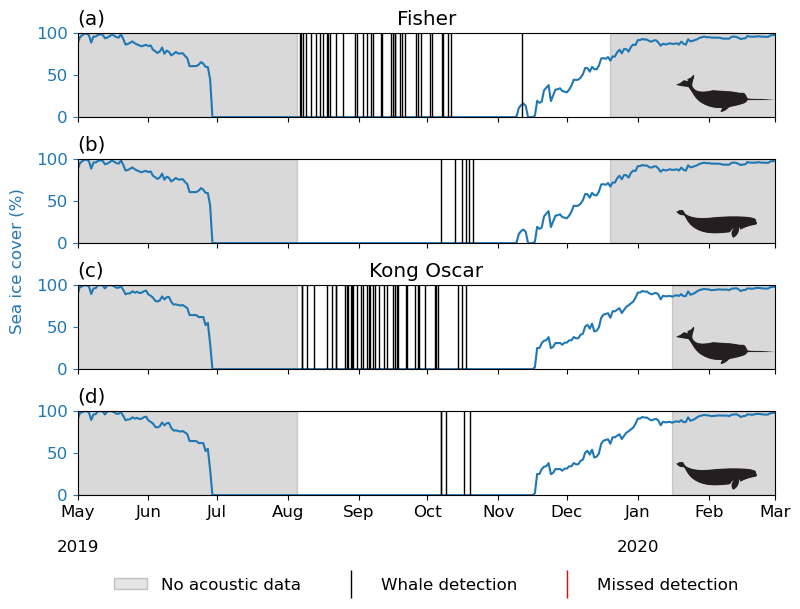

In [51]:
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams['font.size'] = 12
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4, sharex=True, sharey=True)

plt.subplots_adjust(hspace=0.5)
ax1.set_xlim(np.datetime64('2019-05-01'), np.datetime64('2020-03-01'))

## FISHER ====
(ice_fish_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax1)
(ice_fish_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax2)

# add detections ----
for xcoord in fish_narwhal_dets:
    ax1.axvline(x=xcoord, color='k', linewidth=1)
for xcoord in fish_beluga_dets:
    ax2.axvline(x=xcoord, color='k', linewidth=1)

## KONG OSCAR ====
(ice_kong_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax3)
(ice_kong_ds*100).sel(time=slice("2019-03","2020-04")).plot(ax=ax4)

# add detections ----
for xcoord in kong_narwhal_dets:
    ax3.axvline(x=xcoord, color='k', linewidth=1)
for xcoord in kong_beluga_dets:
    ax4.axvline(x=xcoord, color='k', linewidth=1)

ax4.set_xlabel("Month",labelpad=20)

for ax in (ax1,ax2,ax3,ax4):
    ax.set_title("")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.margins(x=0,y=0)
    ax.set_ylim(0,100)
    ax.tick_params(axis='y', colors='tab:blue')

ax1.set_title("Fisher")
ax1.set_title("(a)", loc='left')
ax2.set_title("(b)", loc='left')
ax3.set_title("Kong Oscar")
ax3.set_title("(c)", loc='left')
ax4.set_title("(d)", loc='left')

# shade regions when ST was not recording
# Fisher
for ax in (ax1,ax2):
    ax.axvspan(np.datetime64('2019-03-01'), np.datetime64('2019-08-05'), color='black', alpha=0.15)
    ax.axvspan(np.datetime64('2019-12-20'), np.datetime64('2020-04-01'), color='black', alpha=0.15)
# Kong Oscar
for ax in (ax3,ax4):
    ax.axvspan(np.datetime64('2019-03-01'), np.datetime64('2019-08-05'), color='black', alpha=0.15)
    ax.axvspan(np.datetime64('2020-01-16'), np.datetime64('2020-04-01'), color='black', alpha=0.15);
    
months   = pd.period_range(np.datetime64('2019-05'), freq='M', periods=11).strftime('%Y-%m').tolist()
abbrev = ["May\n\n2019",'Jun','Jul','Aug',"Sep","Oct",'Nov','Dec',"Jan\n\n2020",'Feb','Mar']
ax4.set_xticks(months, [])
ax4.set_xticks(months, abbrev, rotation=0, horizontalalignment = 'center');

## add icons for beluga and narwhal
beluga  = plt.imread('beluga_icon.png') # insert local path of the image
narwhal = plt.imread('narwhal_icon.png')
## plot icons
ax1_insert = fig.add_axes([0.79,0.7,0.11,0.11], anchor='NE', zorder=1)
ax1_insert.imshow(narwhal)
ax2_insert = fig.add_axes([0.79,0.495,0.09,0.09], anchor='NE', zorder=1)
ax2_insert.imshow(beluga)
ax3_insert = fig.add_axes([0.79,0.28,0.11,0.11], anchor='NE', zorder=1)
ax3_insert.imshow(narwhal)
ax4_insert = fig.add_axes([0.79,0.075,0.09,0.09], anchor='NE', zorder=1)
ax4_insert.imshow(beluga)

fig.text(0.05,0.5,"Sea ice cover (%)",verticalalignment='center',color='tab:blue',rotation=90)

for ax in (ax1_insert,ax2_insert,ax3_insert,ax4_insert):
    ax.axis('off')
    
## add legend
legend_elements = [Patch(facecolor='tab:gray', alpha=0.2, edgecolor='k', label='No acoustic data'),
                   Line2D([], [], marker='|', linestyle='None',color='k', lw=1,markersize=20, label='Whale detection'),
                   Line2D([], [], marker='|', linestyle='None',color='r', lw=1,markersize=20, label='Missed detection')]
ax4.legend(handles=legend_elements, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.8),frameon=False);

plt.savefig('figures/detections_seaice_fig.png', bbox_inches='tight', dpi=300, facecolor='white')